In [69]:
import pandas as pd
from collections import defaultdict
import scipy

In [70]:
with open("coin_die_assignments_groundtruth.csv") as file:
    lines = file.read().splitlines()[1:]

In [71]:
lines = [x.split(",") for x in lines]

In [72]:
path = "../Stempelliste_bueschel_Neuses_einfach.xlsx"
df = pd.read_excel(path, engine='openpyxl')

averse = defaultdict(list)
reverse = defaultdict(list)

ID = df["Dédalo ID"]
A = df["Stempeluntergruppe Av"]
R = df["Stempeluntergruppe Rv"]

for id_val, av, rv in zip(ID, A, R):
    averse[av].append(id_val)
    reverse[rv].append(id_val)
    
averse = {str(k): v for k, v in averse.items()}
reverse = {str(k): v for k, v in reverse.items()}
#averse = reverse

In [73]:
averse["Av_11"]

[3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3583, 3612, 3718, 3719]

In [74]:
lines
hmm_results = defaultdict(list)
for coin in lines:
    hmm_results[coin[1]].append(int(coin[2].split("/")[-1].split("_")[0]))

In [75]:
# HUNGARIAN ALGORITHM FOR OPTIMAL MATCHING
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 0: Build reverse map from value to Averse group
value_to_av = {}
for group, values in averse.items():
    for v in values:
        value_to_av[v] = group

# Step 1: Ensure all HMM values are integers
hmm_results_int = {k: list(map(int, v)) for k, v in hmm_results.items()}

from scipy.optimize import linear_sum_assignment
import numpy as np

# List of HMM and Averse group names (sorted for reproducibility)
hmm_keys = sorted(hmm_results_int.keys())
av_groups = sorted(averse.keys())

# Step 1: Build cost matrix (rows = HMM groups, cols = Averse groups)
cost_matrix = np.zeros((len(hmm_keys), len(av_groups)), dtype=int)

# Fill the cost matrix with -overlap counts (to maximize overlap)
for i, hmm_key in enumerate(hmm_keys):
    values = set(hmm_results_int[hmm_key])
    for j, av_group in enumerate(av_groups):
        overlap = values.intersection(averse[av_group])
        cost_matrix[i, j] = -len(overlap)  # negative for maximization

# Step 2: Apply Hungarian Algorithm
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Step 3: Create the renamed HMM dictionary
assigned_av_names = {}
for i, j in zip(row_ind, col_ind):
    hmm_key = hmm_keys[i]
    av_group = av_groups[j]
    assigned_av_names[hmm_key] = av_group

# Step 4: Rename HMM groups using assignment
renamed_hmm_results = {
    assigned_av_names[k]: hmm_results_int[k] for k in assigned_av_names
}

# Step 5: Recompute overlap distribution
av_hmm_distribution_renamed = defaultdict(lambda: defaultdict(int))

for hmm_key, values in renamed_hmm_results.items():
    for val in values:
        av_group = value_to_av.get(val)
        if av_group:
            av_hmm_distribution_renamed[av_group][hmm_key] += 1

# Step 6: Prepare data for plotting
plot_data_renamed = []
for av_group, hmm_map in av_hmm_distribution_renamed.items():
    for hmm_group, count in hmm_map.items():
        plot_data_renamed.append((av_group, hmm_group, count))

df_renamed = pd.DataFrame(plot_data_renamed, columns=['Averse Group', 'HMM Group (Renamed)', 'Count'])


In [49]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 0: Build reverse map from value to Averse group
value_to_av = {}
for group, values in averse.items():
    for v in values:
        value_to_av[v] = group

# Step 1: Ensure all HMM values are integers
hmm_results_int = {k: list(map(int, v)) for k, v in hmm_results.items()}

# Step 2: Count how many elements from each Averse group appear in each HMM group
hmm_to_av_votes = defaultdict(lambda: defaultdict(int))

for hmm_key, values in hmm_results_int.items():
    for val in values:
        av_group = value_to_av.get(val)
        if av_group:
            hmm_to_av_votes[hmm_key][av_group] += 1

print(hmm_to_av_votes)
# Step 3: Assign each HMM group to the Averse group with the most overlaps
assigned_av_names = {}
used_av_names = set()

for hmm_key in hmm_results_int.keys():
    votes = hmm_to_av_votes.get(hmm_key, {})
    if votes:
        # Sort votes by count (descending), then alphabetically
        sorted_votes = sorted(votes.items(), key=lambda x: (-x[1], x[0]))
        for av_group, _ in sorted_votes:
            if av_group not in used_av_names:
                assigned_av_names[hmm_key] = av_group
                used_av_names.add(av_group)
                break
        else:
            # If all av_groups are used, assign a fallback name
            assigned_av_names[hmm_key] = f"Unmatched_{hmm_key}"
    else:
        # No overlaps at all
        assigned_av_names[hmm_key] = f"Unmatched_{hmm_key}"

# Step 4: Apply renaming safely
renamed_hmm_results = {
    assigned_av_names[k]: v for k, v in hmm_results_int.items()
}

# Step 5: Recompute overlap distribution
av_hmm_distribution_renamed = defaultdict(lambda: defaultdict(int))

for hmm_key, values in renamed_hmm_results.items():
    for val in values:
        av_group = value_to_av.get(val)
        if av_group:
            av_hmm_distribution_renamed[av_group][hmm_key] += 1

# Step 6: Prepare data for plotting
plot_data_renamed = []
for av_group, hmm_map in av_hmm_distribution_renamed.items():
    for hmm_group, count in hmm_map.items():
        plot_data_renamed.append((av_group, hmm_group, count))

df_renamed = pd.DataFrame(plot_data_renamed, columns=['Averse Group', 'HMM Group (Renamed)', 'Count'])



defaultdict(<function <lambda> at 0x74b47bfe47c0>, {'7': defaultdict(<class 'int'>, {'Av_24': 1, 'Av_22': 1, 'Av_25': 1, 'Av_01': 1, 'Av_21': 1, 'Av_06': 1, 'Av_14': 1}), '9': defaultdict(<class 'int'>, {'Av_24': 3, 'Av_01': 10, 'Av_25': 4, 'Av_23': 2, 'Av_22': 1, 'nan': 5, 'Av_07': 4, 'Av_18': 4, 'Av_11': 8, 'Av_03': 3, 'Av_05': 1, 'Av_14': 5, 'Av_09': 3, 'Av_02': 7, 'Av_13': 6, 'Av_08': 4, 'Av_21': 6, 'Av_20': 2, 'Av_06': 3, 'Av_12': 1, 'Av_19': 2, 'Av_17': 4, 'Av_10': 1, 'Av_04': 1, 'Av_16': 1, 'Av_15': 1}), '0': defaultdict(<class 'int'>, {'Av_22': 2, 'nan': 4, 'Av_25': 1, 'Av_23': 2, 'Av_03': 2, 'Av_01': 7, 'Av_08': 1, 'Av_13': 4, 'Av_09': 2, 'Av_05': 2, 'Av_14': 4, 'Av_02': 1, 'Av_07': 2, 'Av_20': 3, 'Av_18': 2, 'Av_06': 1, 'Av_04': 1, 'Av_12': 1}), '18': defaultdict(<class 'int'>, {'Av_24': 3, 'Av_15': 1, 'Av_10': 1, 'Av_18': 2, 'Av_03': 2, 'Av_04': 1, 'Av_14': 1}), '8': defaultdict(<class 'int'>, {'Av_25': 2, 'Av_07': 1, 'Av_01': 1, 'Av_13': 1, 'Av_02': 2, 'Av_20': 2, 'Av_11': 

In [65]:
numval=0
for key, values in renamed_hmm_results.items():
    numval += len(values)

print(numval)

223


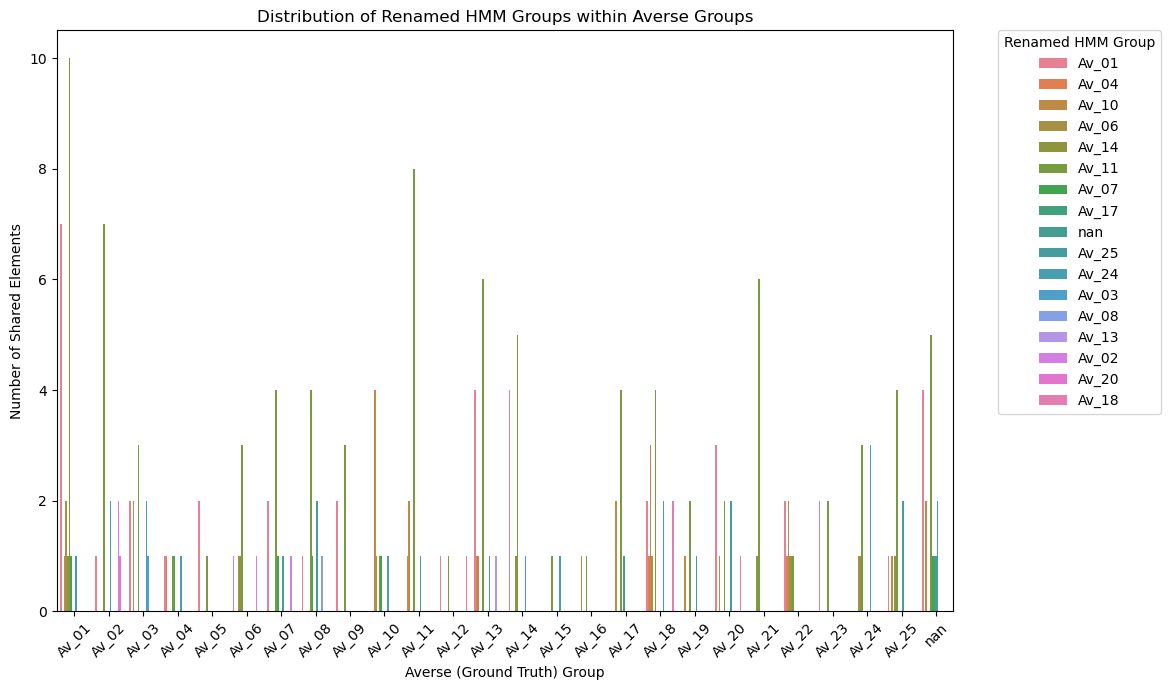

In [76]:
# Step 7: Plotting with alphabetically sorted x-axis
plt.figure(figsize=(14, 7))  # bigger figure (width=14, height=7)

sorted_av_groups = sorted(df_renamed['Averse Group'].unique())

sns.barplot(
    data=df_renamed,
    x='Averse Group',
    y='Count',
    hue='HMM Group (Renamed)',
    order=sorted_av_groups
)

plt.title("Distribution of Renamed HMM Groups within Averse Groups")
plt.xlabel("Averse (Ground Truth) Group")
plt.ylabel("Number of Shared Elements")
plt.xticks(rotation=45)

plt.legend(
    title="Renamed HMM Group",
    bbox_to_anchor=(1.05, 1),  # x=1.05 moves it just outside right
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space on right for legend

# Save the figure before showing it
plt.savefig("hmm_distribution_plot_groundthruth.png", dpi=300, bbox_inches='tight')

plt.show()


In [77]:
print([x for x in plot_data_renamed if x[0] == "Av_11"])

[('Av_11', 'Av_04', 1), ('Av_11', 'Av_10', 2), ('Av_11', 'Av_25', 1), ('Av_11', 'Av_11', 8)]


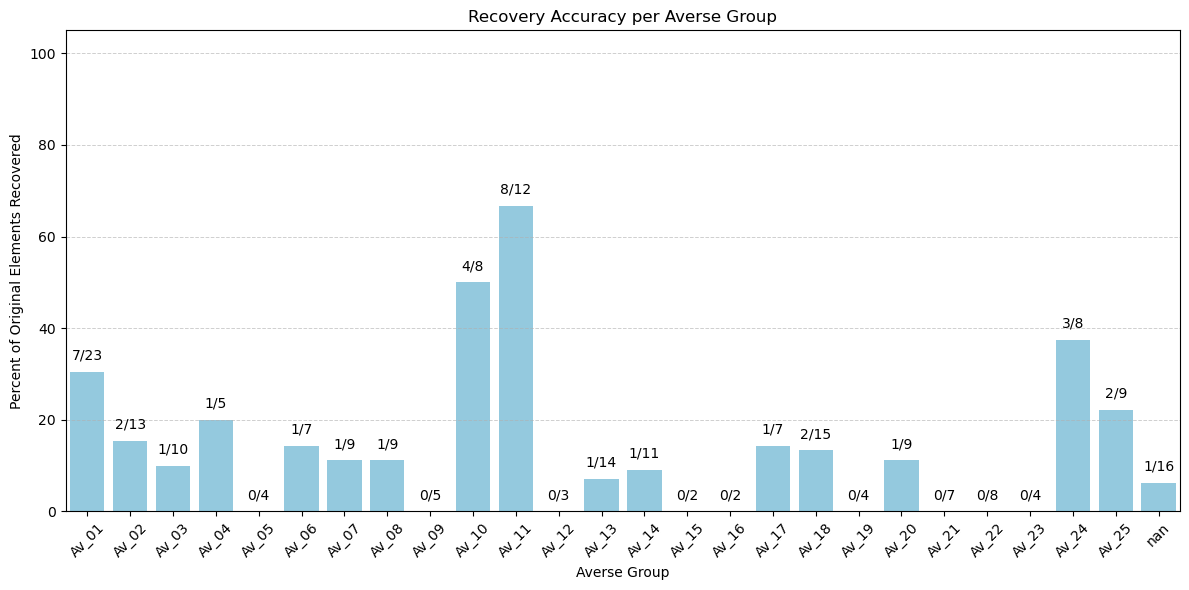

In [78]:
# Step 8: Compute recovery accuracy per Averse group (with actual counts)
recovery_data = []

for av_group, original_values in averse.items():
    original_set = set(original_values)
    recovered_set = set(renamed_hmm_results.get(av_group, []))  # get values from renamed HMM group

    recovered = len(original_set & recovered_set)
    total = len(original_set)
    percent = (recovered / total) * 100 if total > 0 else 0

    # Store group name, percentage, and counts
    recovery_data.append({
        'Averse Group': av_group,
        'Recovery %': percent,
        'Recovered': recovered,
        'Total': total
    })

# Create DataFrame
df_recovery = pd.DataFrame(recovery_data)


# Step 9: Plot recovery percentages with absolute counts
plt.figure(figsize=(12, 6))

sorted_groups = sorted(df_recovery['Averse Group'])

sns.barplot(
    data=df_recovery,
    x='Averse Group',
    y='Recovery %',
    order=sorted_groups,
    color='skyblue'
)

plt.title("Recovery Accuracy per Averse Group")
plt.ylabel("Percent of Original Elements Recovered")
plt.xlabel("Averse Group")
plt.ylim(0, 105)
plt.xticks(rotation=45)


# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Annotate each bar with actual recovered/total
for i, row in df_recovery.iterrows():
    group_index = sorted_groups.index(row['Averse Group'])
    label = f"{row['Recovered']}/{row['Total']}"
    plt.text(group_index, row['Recovery %'] + 2, label, ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("hmm_recovery_accuracy_with_counts_fixed.png", dpi=300, bbox_inches='tight')
plt.show()


